<a href="https://colab.research.google.com/github/sbien1208/projet_python/blob/main/Projet_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("/content/diabetic_data.csv", sep =",")
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88907,286585800,45689841,Hispanic,Male,[30-40),?,2.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
88908,286585842,84342204,Caucasian,Female,[70-80),?,1.0,1.0,7.0,1.0,...,No,No,No,No,No,No,No,No,No,>30
88909,286590600,59953077,Caucasian,Female,[60-70),?,3.0,1.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
88910,286591476,84727305,Caucasian,Female,[80-90),?,3.0,1.0,1.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO


In [ ]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip()
print(data['weight'])

0          ?
1          ?
2          ?
3          ?
4          ?
        ... 
88907      ?
88908      ?
88909      ?
88910      ?
88911    NaN
Name: weight, Length: 88912, dtype: object


In [ ]:
data = data.drop('weight', axis=1)

In [ ]:
data.columns = data.columns.str.strip()
print(data['payer_code'])

0          ?
1          ?
2          ?
3          ?
4          ?
        ... 
88907     OG
88908     MC
88909     MC
88910     HM
88911    NaN
Name: payer_code, Length: 88912, dtype: object


We need to replace the admission_type_id by its description.

In [ ]:
correspondance = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

data['admission_type_id'] = data['admission_type_id'].replace(correspondance)

We do the same with the column 'discharge_disposition_id'

In [ ]:
correspondance = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: '"Expired at home. Medicaid only, hospice"',
    20: '"Expired in a medical facility. Medicaid only, hospice"',
    21: '"Expired, place unknown. Medicaid only, hospice"',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital',
    23: 'Discharged/transferred to a long term care hospital',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to a federal health care facility',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH)',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'

}

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(correspondance)

In [ ]:
correspondance = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critial access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

data['admission_source_id'] = data['admission_source_id'].replace(correspondance)

In [ ]:
correspondance = {
    '?': 'MissingValue'
}

data['payer_code'] = data['payer_code'].replace(correspondance)
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3.0,MissingValue,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1.0,MissingValue,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88907,286585800,45689841,Hispanic,Male,[30-40),Urgent,Discharged to home,Emergency Room,1.0,OG,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
88908,286585842,84342204,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,1.0,MC,...,No,No,No,No,No,No,No,No,No,>30
88909,286590600,59953077,Caucasian,Female,[60-70),Elective,Discharged to home,Physician Referral,1.0,MC,...,No,No,No,No,No,No,No,No,No,NO
88910,286591476,84727305,Caucasian,Female,[80-90),Elective,Discharged to home,Physician Referral,2.0,HM,...,No,No,No,No,No,No,No,No,Yes,NO


In [ ]:
data['time_in_hospital'].value_counts(dropna=False)

3.0     15302
2.0     14986
1.0     12229
4.0     12136
5.0      8743
6.0      6617
7.0      5164
8.0      3919
9.0      2665
10.0     2116
11.0     1675
12.0     1319
13.0     1090
14.0      950
NaN         1
Name: time_in_hospital, dtype: int64

In [ ]:
data = data.dropna(subset=['time_in_hospital'])

In [ ]:
data['citoglipton'].value_counts()

No    88911
Name: citoglipton, dtype: int64

In [ ]:
data = data.drop('citoglipton', axis=1)

In [ ]:
data['glyburide-metformin'].value_counts()

No        88307
Steady      590
Up            8
Down          6
Name: glyburide-metformin, dtype: int64

In [ ]:
data = data.drop('glyburide-metformin', axis=1)

In [ ]:
data['glipizide-metformin'].value_counts()

No        88898
Steady       13
Name: glipizide-metformin, dtype: int64

In [ ]:
data = data.drop('glipizide-metformin', axis=1)

In [ ]:
data['glimepiride-pioglitazone'].value_counts()

No        88910
Steady        1
Name: glimepiride-pioglitazone, dtype: int64

In [ ]:
data = data.drop('glimepiride-pioglitazone', axis=1)

In [ ]:
data['metformin-rosiglitazone'].value_counts()

No        88910
Steady        1
Name: metformin-rosiglitazone, dtype: int64

In [ ]:
data = data.drop('metformin-rosiglitazone', axis=1)

In [ ]:
data['metformin-pioglitazone'].value_counts()

No    88911
Name: metformin-pioglitazone, dtype: int64

In [ ]:
data = data.drop('metformin-pioglitazone', axis=1)

In [ ]:
data['payer_code'].value_counts()

MissingValue    38453
MC              26689
HM               5127
SP               4149
BC               3807
MD               2778
UN               2214
CP               2096
CM               1466
OG                814
PO                482
DM                467
WC                110
CH                 87
OT                 69
SI                 55
MP                 47
FR                  1
Name: payer_code, dtype: int64

In [ ]:
data['troglitazone'].value_counts()

No        88908
Steady        3
Name: troglitazone, dtype: int64

In [ ]:
data = data.drop('troglitazone', axis=1)

In [ ]:
data['examide'].value_counts()

No    88911
Name: examide, dtype: int64

In [ ]:
data = data.drop('examide', axis=1)

In [ ]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1.0,MissingValue,...,No,No,No,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88906,286584456,33325848,Caucasian,Female,[60-70),Urgent,Discharged/transferred to SNF,Emergency Room,3.0,MC,...,No,No,No,No,No,No,Up,Ch,Yes,>30
88907,286585800,45689841,Hispanic,Male,[30-40),Urgent,Discharged to home,Emergency Room,1.0,OG,...,No,No,No,No,No,No,Steady,Ch,Yes,NO
88908,286585842,84342204,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,1.0,MC,...,No,No,No,No,No,No,No,No,No,>30
88909,286590600,59953077,Caucasian,Female,[60-70),Elective,Discharged to home,Physician Referral,1.0,MC,...,No,No,No,No,No,No,No,No,No,NO


In [ ]:
data['tolbutamide'].value_counts()

No        88888
Steady       23
Name: tolbutamide, dtype: int64

In [ ]:
data = data.drop('tolbutamide', axis=1)

In [ ]:
data['acetohexamide'].value_counts()

No        88910
Steady        1
Name: acetohexamide, dtype: int64

In [ ]:
data = data.drop('acetohexamide', axis=1)

In [ ]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1.0,MissingValue,...,No,No,No,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88906,286584456,33325848,Caucasian,Female,[60-70),Urgent,Discharged/transferred to SNF,Emergency Room,3.0,MC,...,No,No,No,No,No,No,Up,Ch,Yes,>30
88907,286585800,45689841,Hispanic,Male,[30-40),Urgent,Discharged to home,Emergency Room,1.0,OG,...,No,No,No,No,No,No,Steady,Ch,Yes,NO
88908,286585842,84342204,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,1.0,MC,...,No,No,No,No,No,No,No,No,No,>30
88909,286590600,59953077,Caucasian,Female,[60-70),Elective,Discharged to home,Physician Referral,1.0,MC,...,No,No,No,No,No,No,No,No,No,NO


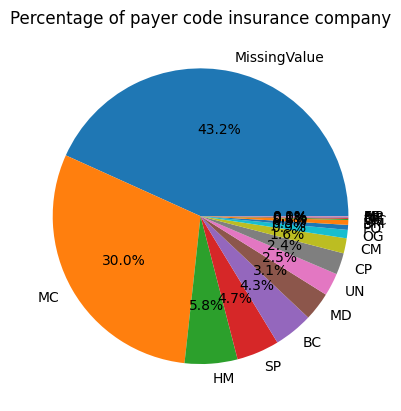

In [ ]:
plt.figure()
plt.pie(data['payer_code'].value_counts(), labels= data['payer_code'].value_counts().index, autopct="%1.1f%%")
plt.title("Percentage of payer code insurance company")
plt.show()

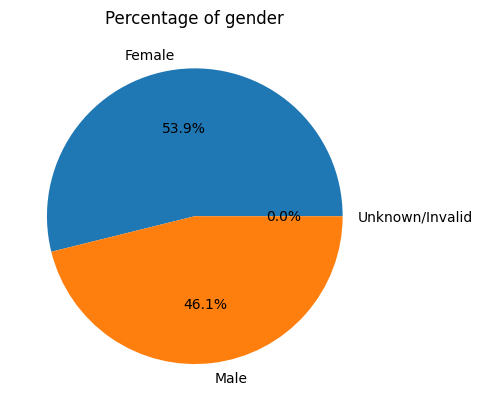

In [ ]:
plt.figure()
plt.pie(data['gender'].value_counts(), labels= data['gender'].value_counts().index, autopct="%1.1f%%")
plt.title("Percentage of gender")
plt.show()

In [ ]:
data['diag_3'].value_counts().head(20)

250       10211
401        7285
276        4471
428        4089
427        3554
414        3100
496        2453
403        1979
585        1746
272        1719
599        1659
?          1364
V45        1283
250.02     1226
707        1213
780        1174
424        1013
285        1012
425         971
250.6       955
Name: diag_3, dtype: int64

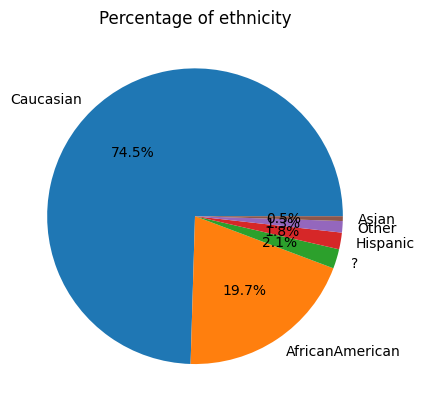

In [ ]:
plt.figure()
plt.pie(data['race'].value_counts(), labels= data['race'].value_counts().index, autopct="%1.1f%%")
plt.title("Percentage of ethnicity")
plt.show()

In [ ]:
data_caucasian = data[data['race']=="Caucasian"]
data_caucasian['race'].value_counts()

Caucasian    66260
Name: race, dtype: int64

In [ ]:
data_african_american = data[data['race']=="AfricanAmerican"]
data_african_american['race'].value_counts()

AfricanAmerican    17555
Name: race, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

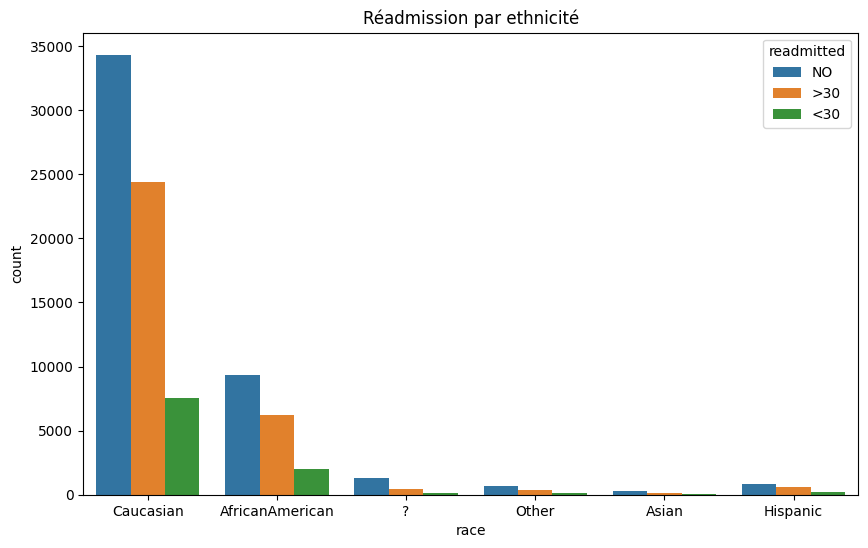

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=data)
plt.title('Réadmission par ethnicité')
plt.show()

In [ ]:
mean_tih_emergency= np.mean(data[data["admission_type_id"]=="Emergency"]["time_in_hospital"])
mean_tih_emergency

4.427342984652226

In [ ]:
mean_tih_not_mapped= np.mean(data[data["admission_type_id"]=="Not Mapped"]["time_in_hospital"])
mean_tih_not_mapped

3.1861313868613137

In [ ]:
mean_tih = data.groupby('admission_type_id')["time_in_hospital"].mean().reset_index()

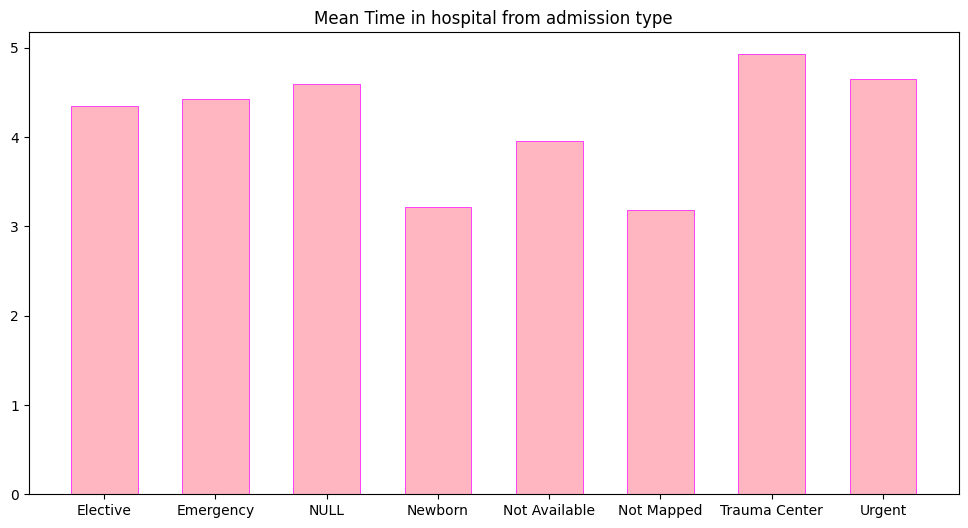

In [ ]:
plt.figure(figsize =(12,6))
plt.bar(mean_tih['admission_type_id'], mean_tih['time_in_hospital'], width=0.6, color = 'lightpink', edgecolor = 'fuchsia',linewidth = 0.5)
plt.title('Mean Time in hospital from admission type')
plt.show()

Text(0, 0.5, 'Nombre de patients')

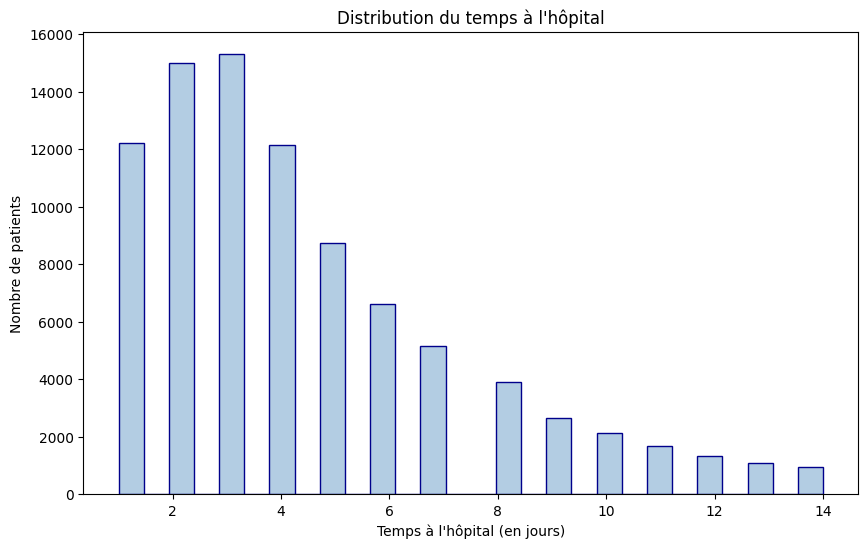

In [ ]:
custom_palette =sns.color_palette("Pastel1", 3)

time_in_hospital = data['time_in_hospital']

plt.figure(figsize=(10, 6))
plt.hist(time_in_hospital, bins=28, color=custom_palette[1], edgecolor='darkblue',linewidth =1)
plt.title('Distribution du temps à l\'hôpital')
plt.xlabel('Temps à l\'hôpital (en jours)')
plt.ylabel('Nombre de patients')

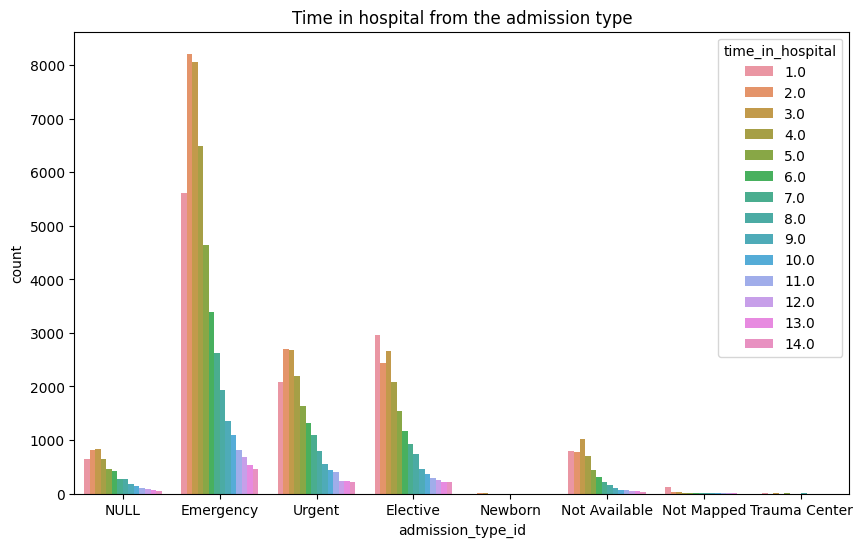

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', hue='time_in_hospital', data=data)
plt.title('Time in hospital from the admission type')
plt.show()

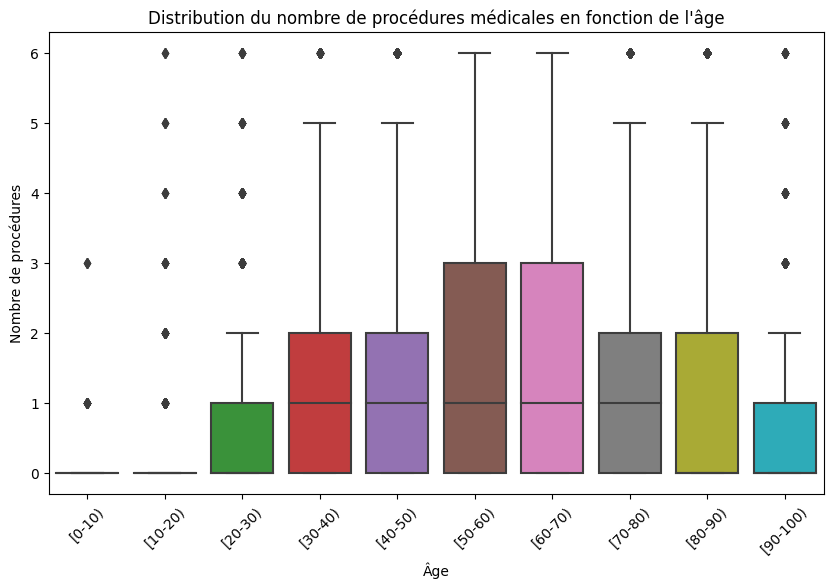

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='num_procedures', data=data)
plt.title('Distribution du nombre de procédures médicales en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de procédures')
plt.xticks(rotation=45)
plt.show()

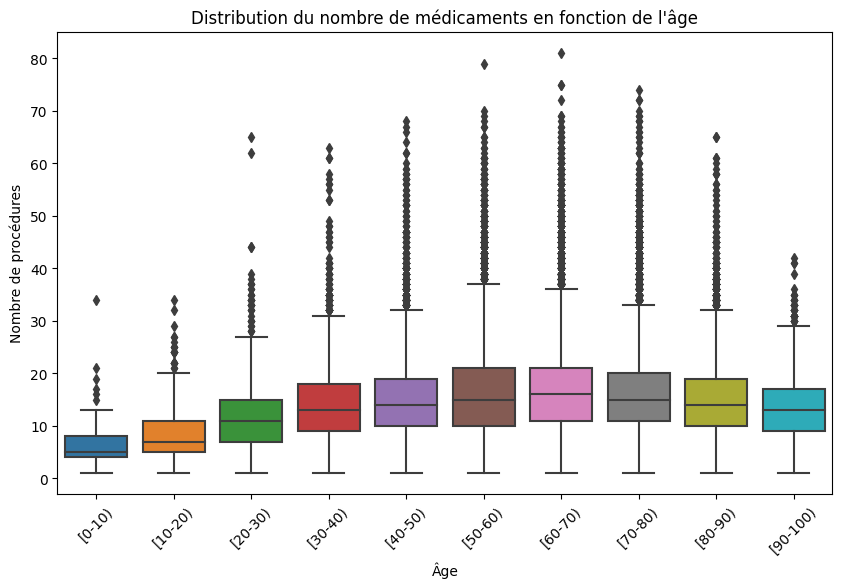

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='num_medications', data=data)
plt.title('Distribution du nombre de médicaments en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de procédures')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'admission_type_id','time_in_hospital', 'race', 'gender', 'age', 'payer_code'

('admission_type_id',
 'time_in_hospital',
 'race',
 'gender',
 'age',
 'payer_code')

<ipython-input-56-2a45f3e170bf>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


Text(0.5, 1.0, 'Matrice de corrélation avec la réadmission')

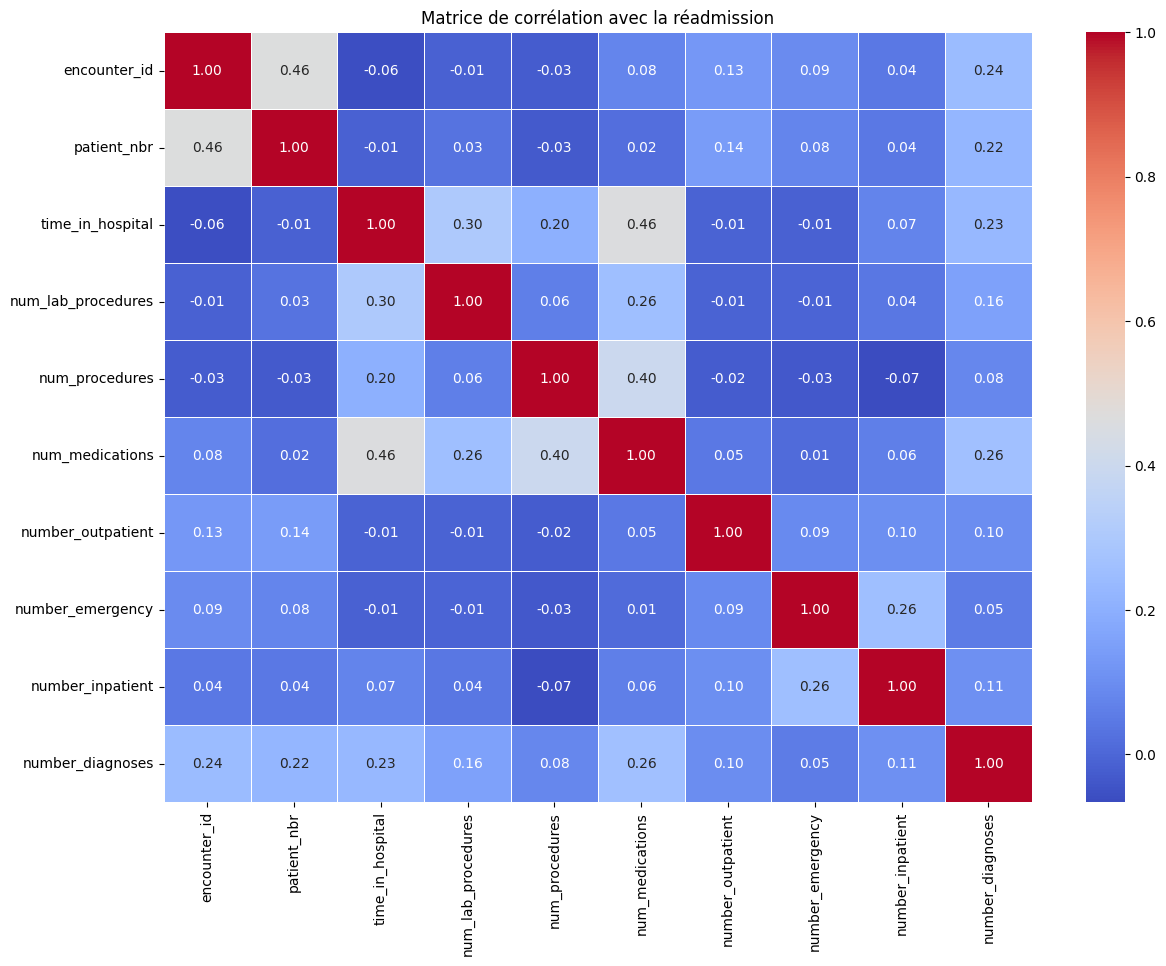

In [ ]:
columns_for_correlation = data.select_dtypes(include=['int64', 'float64']).columns

columns_for_correlation = columns_for_correlation.append(pd.Index(['readmitted']))

correlation_df = data[columns_for_correlation]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation avec la réadmission')

Text(0.5, 1.0, 'Distribution de la réadmission')

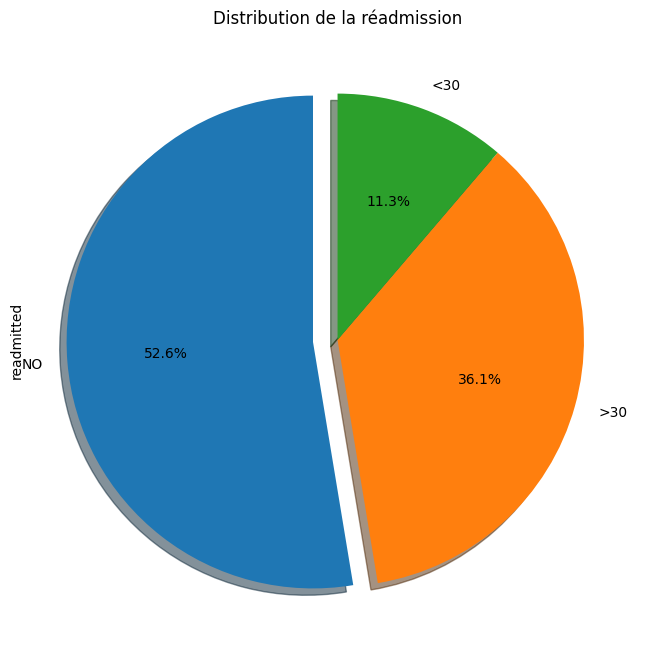

In [ ]:
plt.figure(figsize=(8, 8))
data['readmitted'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0), shadow=True)
plt.title('Distribution de la réadmission')

Text(0, 0.5, 'Nombre de cas')

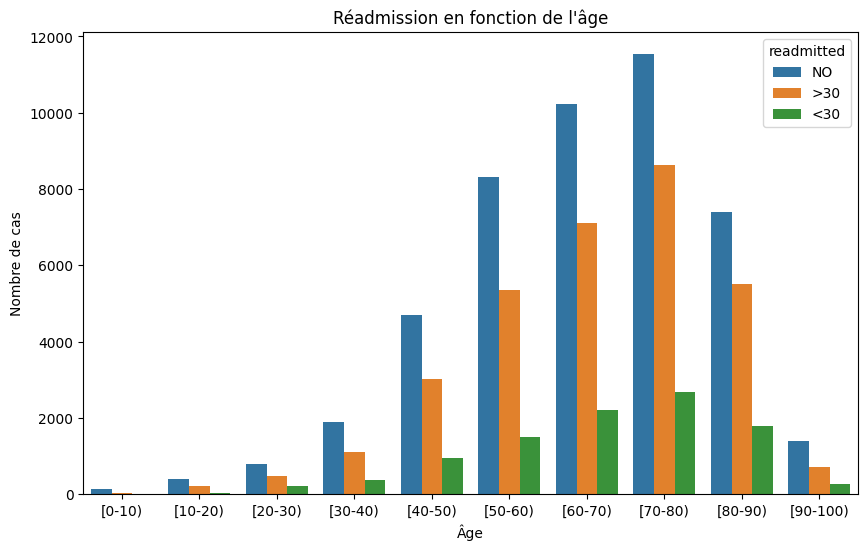

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=data)
plt.title('Réadmission en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de cas')

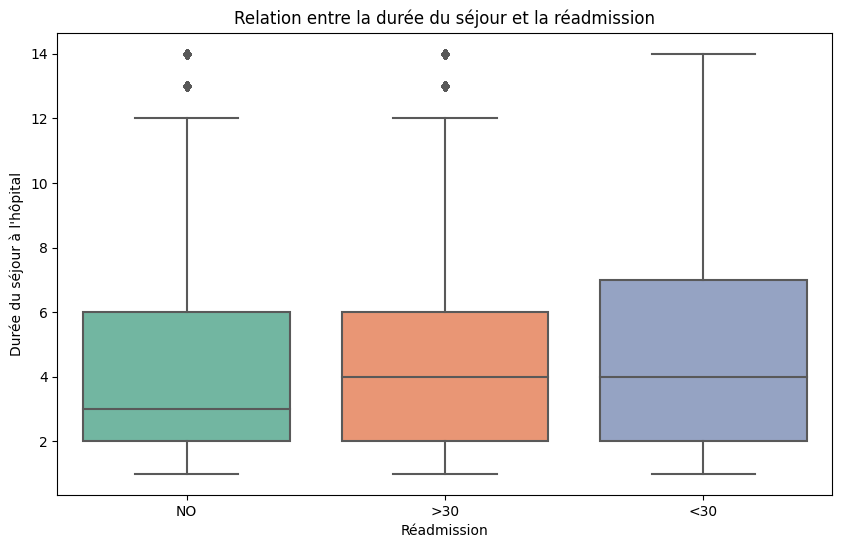

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=data, palette='Set2', order=['NO', '>30', '<30'])
plt.title('Relation entre la durée du séjour et la réadmission')
plt.xlabel('Réadmission')
plt.ylabel('Durée du séjour à l\'hôpital')
plt.show()


Text(0, 0.5, 'Nombre de médicaments')

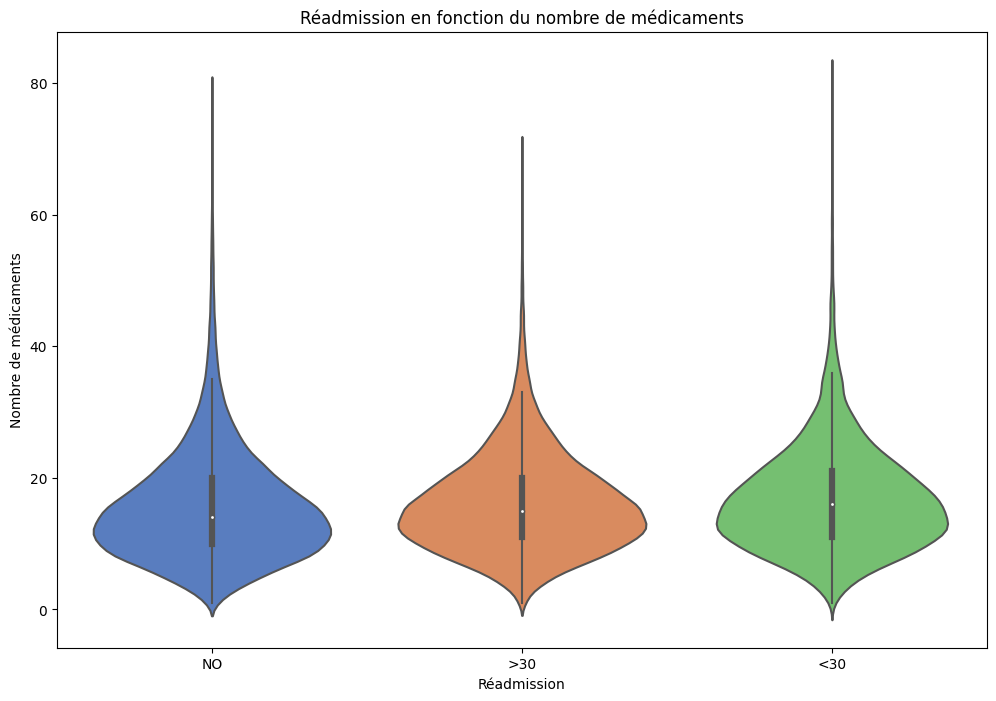

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='readmitted', y='num_medications', data=data, palette='muted')
plt.title('Réadmission en fonction du nombre de médicaments')
plt.xlabel('Réadmission')
plt.ylabel('Nombre de médicaments')

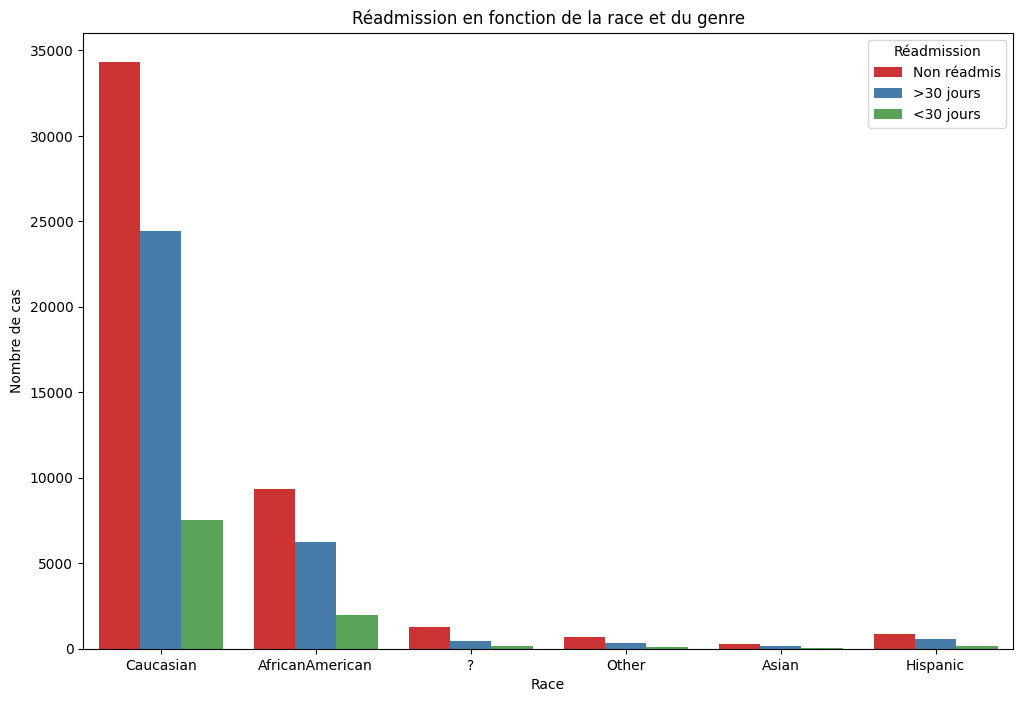

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='race', hue='readmitted', data=data, palette='Set1', hue_order=['NO', '>30', '<30'])
plt.title('Réadmission en fonction de la race et du genre')
plt.xlabel('Race')
plt.ylabel('Nombre de cas')
plt.legend(title='Réadmission', loc='upper right', labels=['Non réadmis', '>30 jours', '<30 jours'])

Text(0.5, 1.0, "Relation entre l'âge, de la durée du séjour et de la réadmission à l'hôpital")

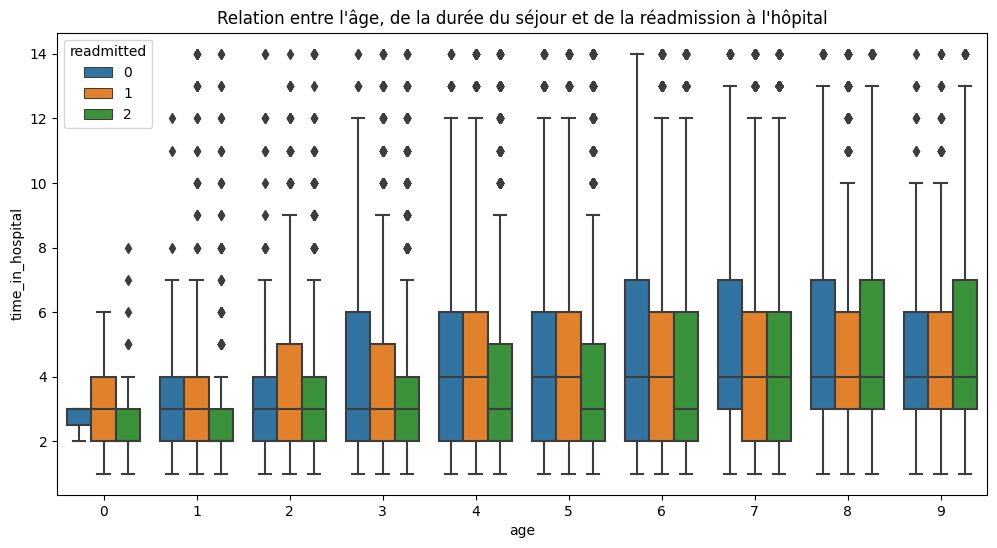

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='time_in_hospital', hue='readmitted', data=data)
plt.title('Relation entre l\'âge, de la durée du séjour et de la réadmission à l\'hôpital')

<Figure size 1000x600 with 0 Axes>

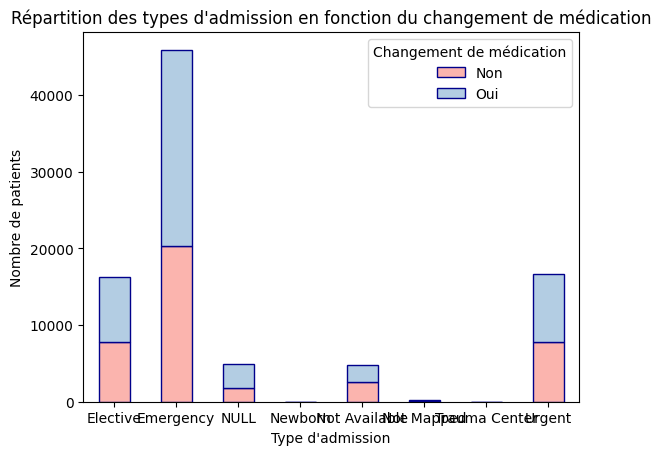

In [ ]:
custom_palette =sns.color_palette("Pastel1", 8)
subset_data = data[['admission_type_id', 'change']]

grouped_data = subset_data.groupby(['admission_type_id', 'change']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True,color=custom_palette, edgecolor='darkblue')
plt.title('Répartition des types d\'admission en fonction du changement de médication')
plt.xlabel('Type d\'admission')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)
plt.legend(title='Changement de médication', loc='upper right', labels=['Non', 'Oui'])

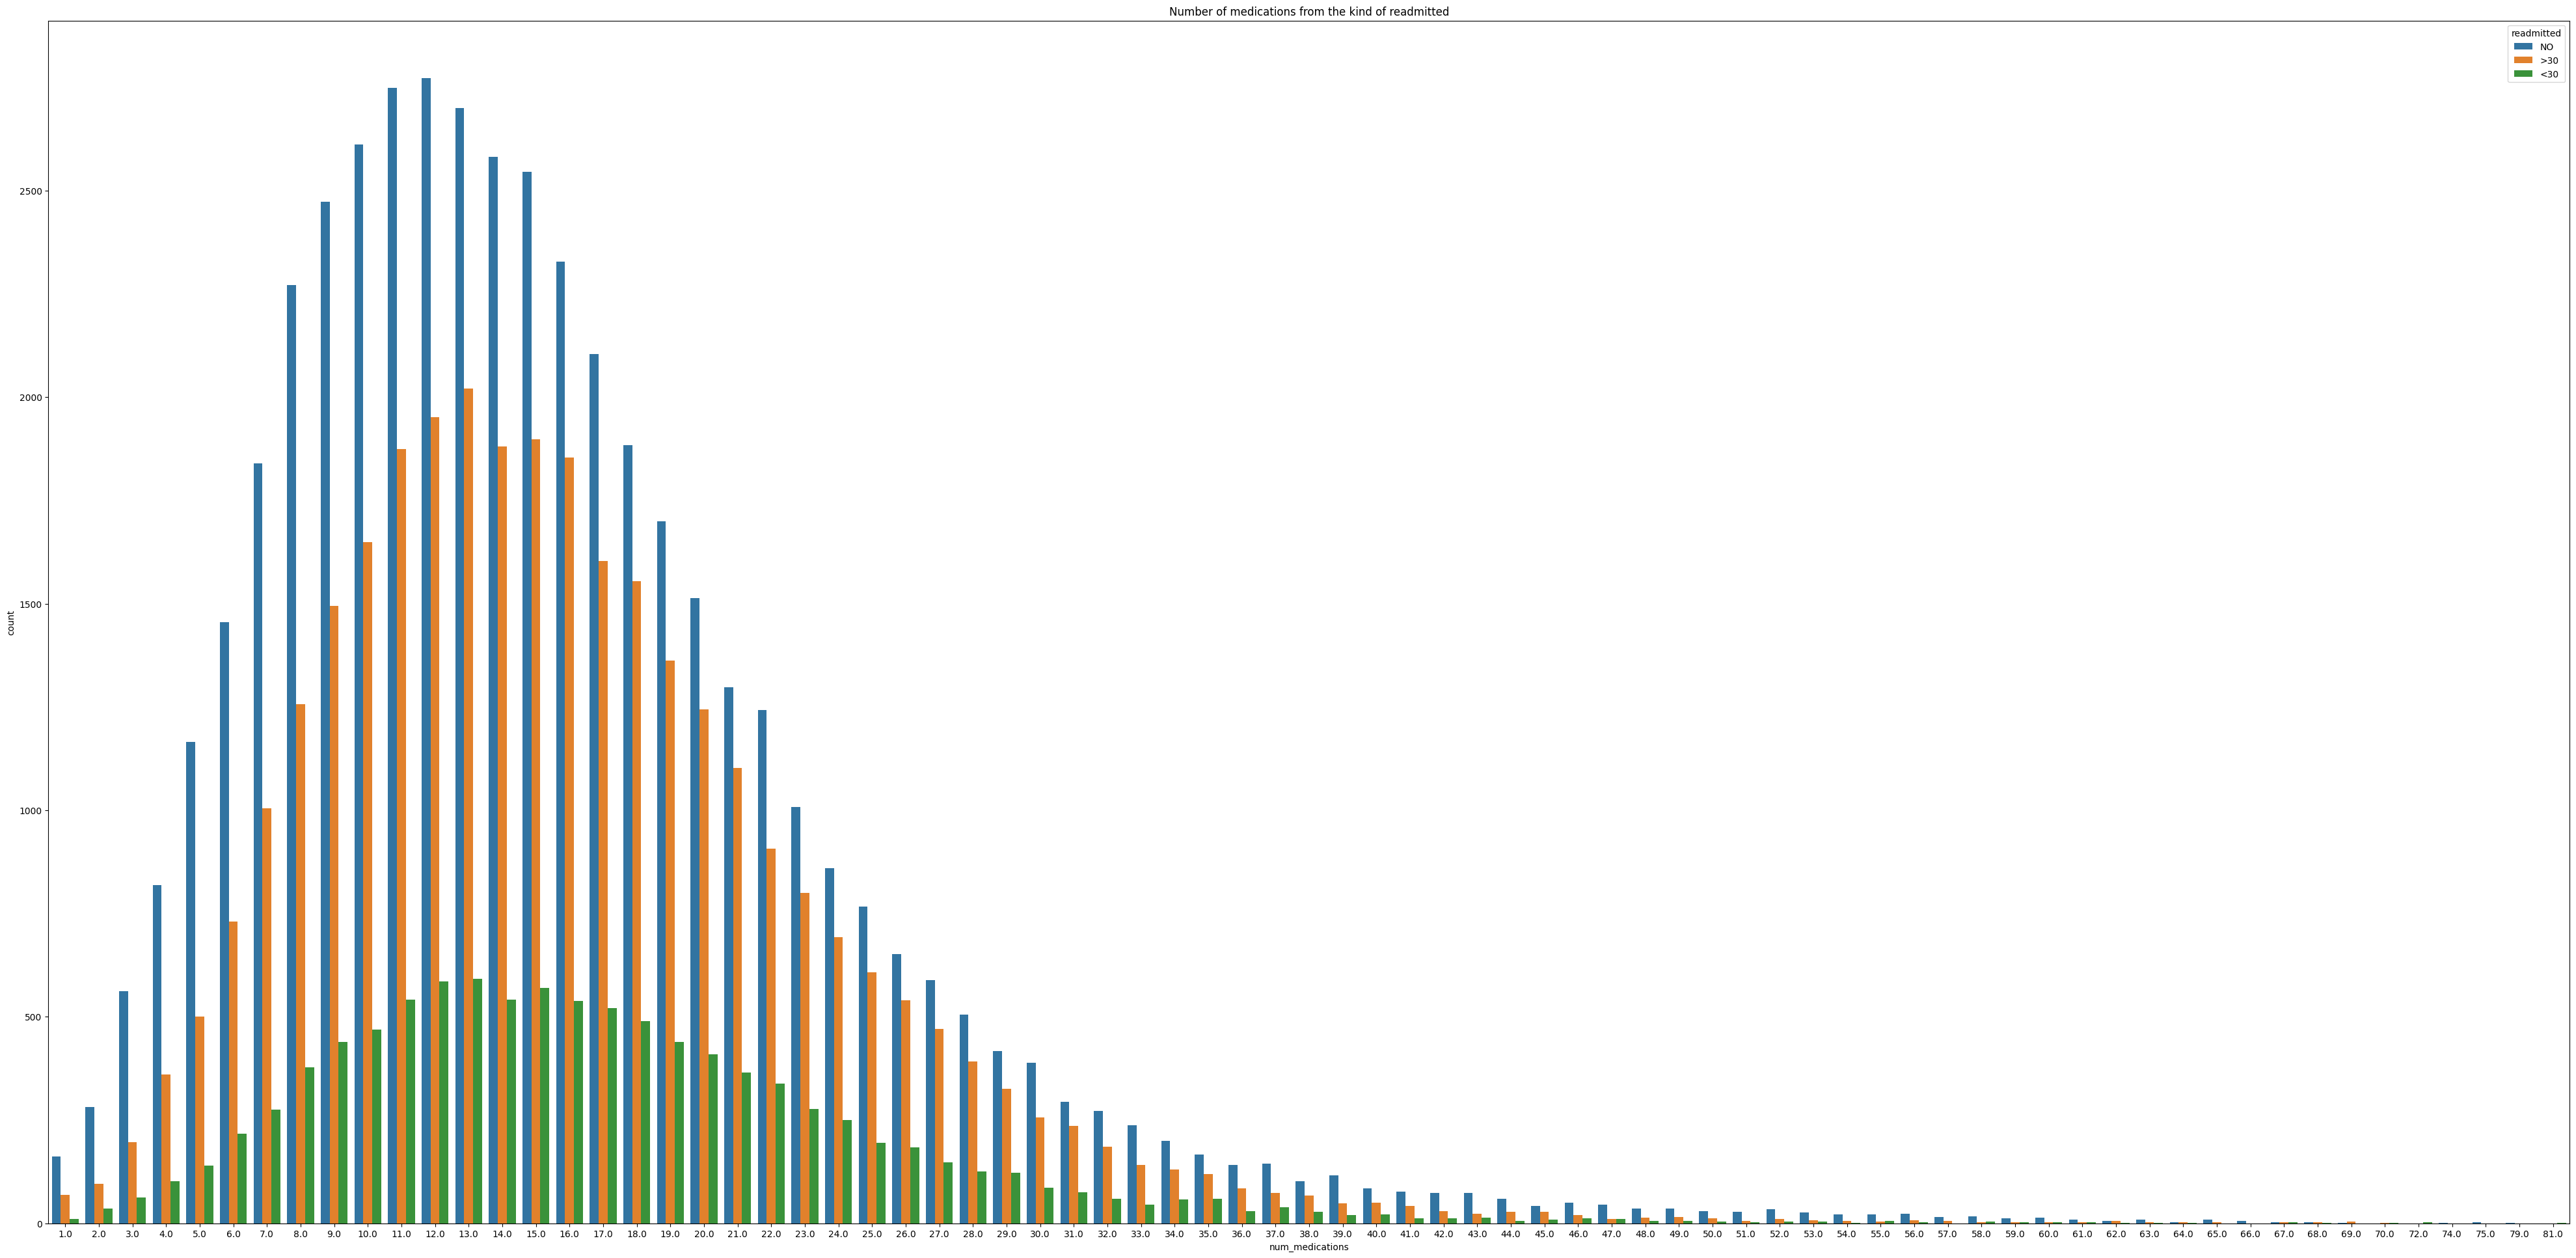

In [ ]:
plt.figure(figsize=(50, 24))
sns.countplot(x='num_medications', hue='readmitted', data=data)
plt.title('Number of medications from the kind of readmitted')
plt.show()

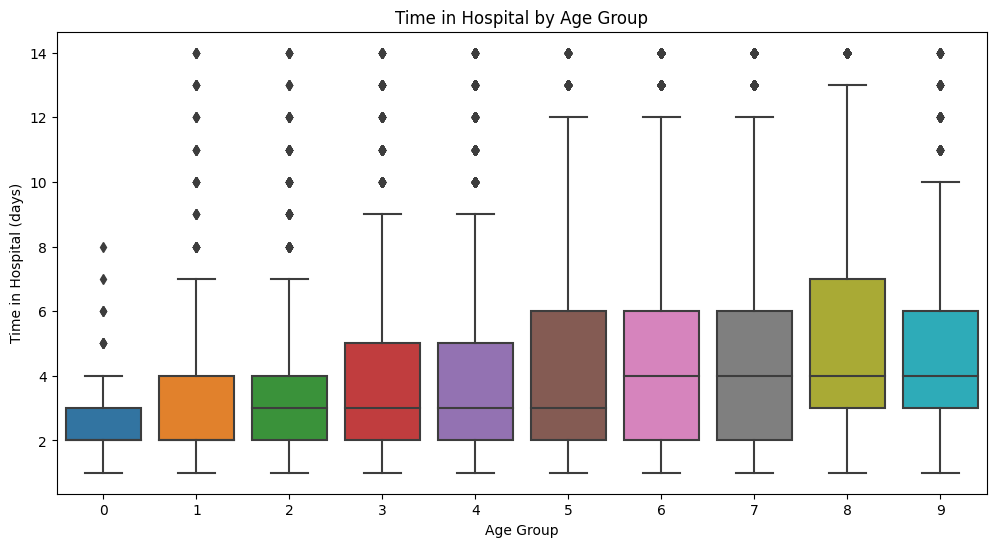

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time in Hospital (days)')
plt.show()

<ipython-input-69-babdbb08ef22>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='num_medications', y='time_in_hospital', data=data, ci=None)


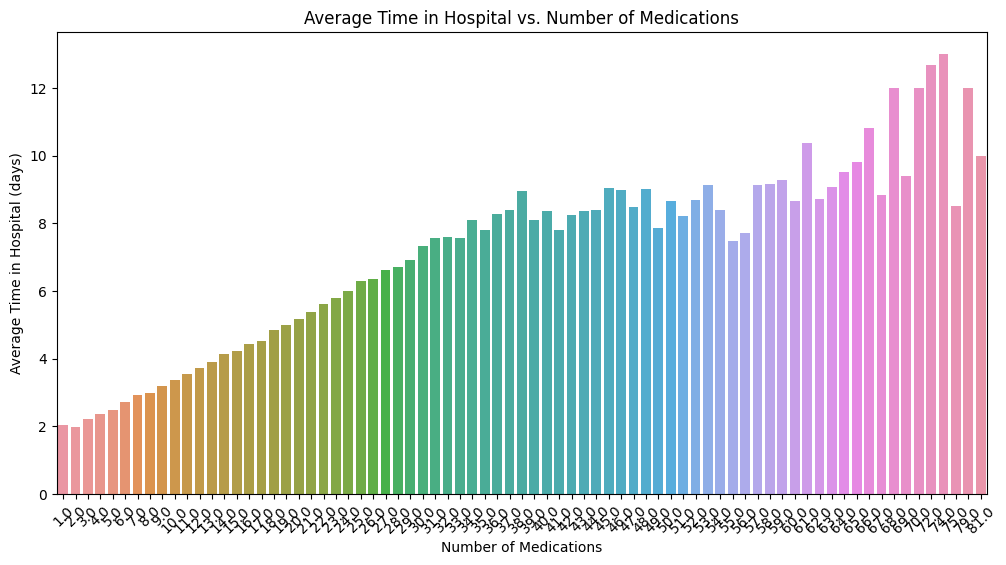

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num_medications', y='time_in_hospital', data=data, ci=None)
plt.title('Average Time in Hospital vs. Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Average Time in Hospital (days)')
plt.xticks(rotation=45)
plt.show()

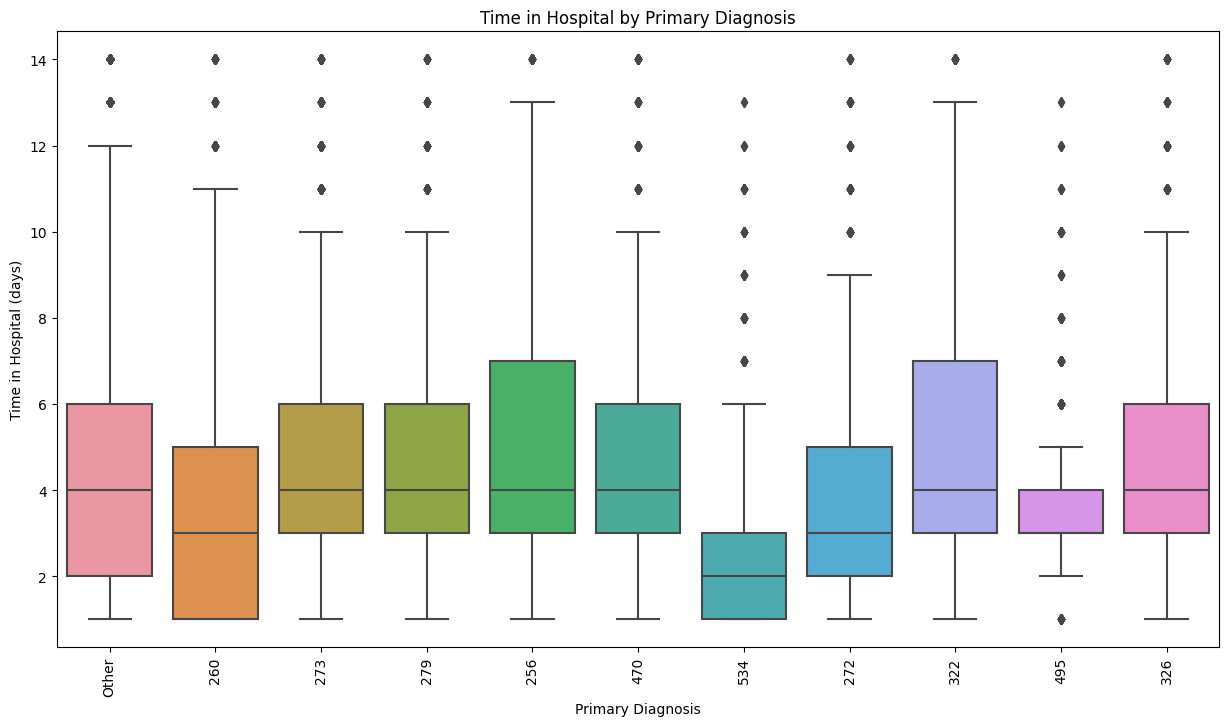

In [ ]:
diag_counts1 = data['diag_1'].value_counts()

top_diagnoses1 = diag_counts1.head(10).index

data['selected_diag_1'] = data['diag_1'].where(data['diag_1'].isin(top_diagnoses1), 'Other')

plt.figure(figsize=(15, 8))
sns.boxplot(x='selected_diag_1', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=90)
plt.show()

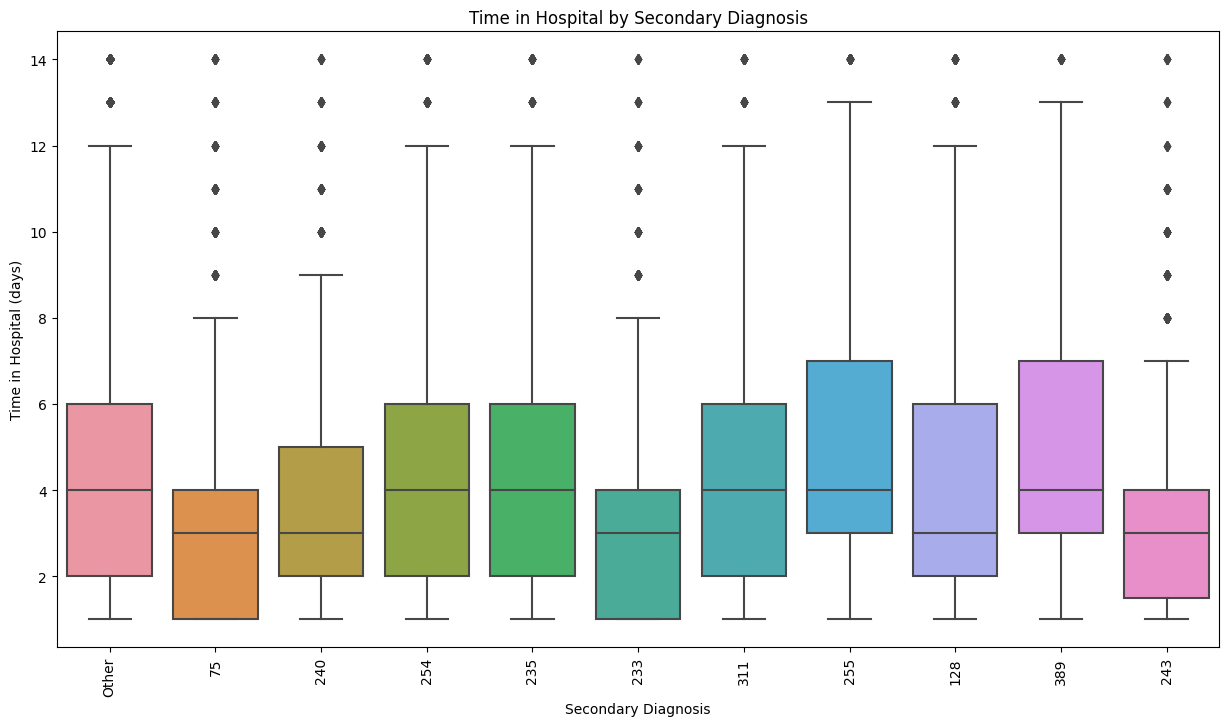

In [ ]:
diag_counts2 = data['diag_2'].value_counts()

top_diagnoses2 = diag_counts2.head(10).index

data['selected_diag_2'] = data['diag_2'].where(data['diag_2'].isin(top_diagnoses2), 'Other')

plt.figure(figsize=(15, 8))
sns.boxplot(x='selected_diag_2', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Secondary Diagnosis')
plt.xlabel('Secondary Diagnosis')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=90)
plt.show()

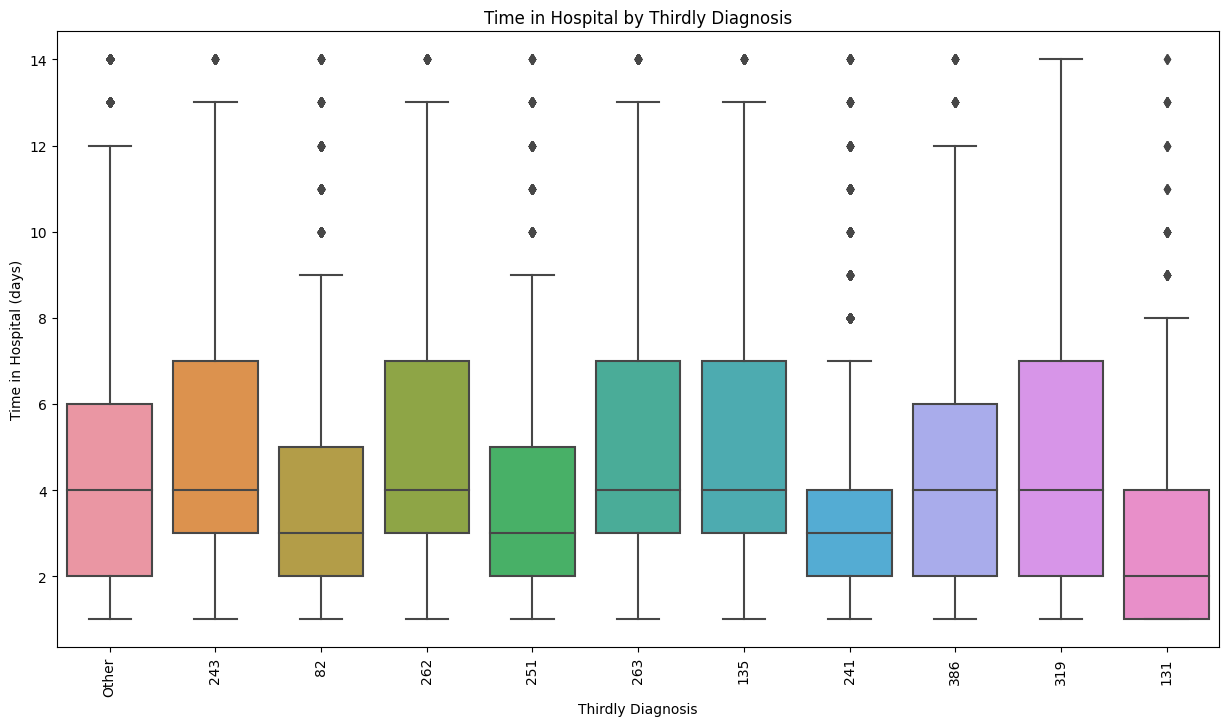

In [ ]:
diag_counts3 = data['diag_3'].value_counts()

top_diagnoses3 = diag_counts3.head(10).index

data['selected_diag_3'] = data['diag_3'].where(data['diag_3'].isin(top_diagnoses3), 'Other')

plt.figure(figsize=(15, 8))
sns.boxplot(x='selected_diag_3', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Thirdly Diagnosis')
plt.xlabel('Thirdly Diagnosis')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=90)
plt.show()

Faire en plusieurs cellules le code suivant

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop('time_in_hospital', axis=1)
y = data['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_rf = RandomForestClassifier()
print("Training Random Forest...")
model_rf.fit(X_train, y_train)

y_pred_RF = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
print(f"\nRandom Forest Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_RF)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_RF)}\n")

Training Random Forest...

Random Forest Accuracy: 0.2522
Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.53      0.50      2832
           2       0.27      0.38      0.32      3405
           3       0.23      0.36      0.28      3587
           4       0.18      0.18      0.18      2837
           5       0.15      0.10      0.12      2040
           6       0.12      0.08      0.09      1506
           7       0.13      0.07      0.09      1155
           8       0.14      0.06      0.08       886
           9       0.08      0.02      0.04       577
          10       0.12      0.03      0.05       452
          11       0.11      0.02      0.03       379
          12       0.12      0.02      0.03       291
          13       0.15      0.03      0.05       206
          14       0.28      0.06      0.10       201

    accuracy                           0.25     20354
   macro avg       0.18      0.14      0.14     20354

In [ ]:
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto'],
    'max_depth': [4, 8],
    'criterion': ['gini']
}

CV_model = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3,n_jobs=-1)

CV_model.fit(X_train, y_train)

print("Meilleurs paramètres : ", CV_model.best_params_)

best_rf_model = CV_model.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nBest Random Forest Accuracy: {accuracy_best:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Meilleurs paramètres :  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

Best Random Forest Accuracy: 0.2481
Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.45      0.47      2832
           2       0.29      0.46      0.35      3405
           3       0.20      0.50      0.29      3587
           4       0.12      0.10      0.11      2837
           5       0.14      0.03      0.05      2040
           6       0.13      0.02      0.03      1506
           7       0.07      0.03      0.04      1155
           8       0.21      0.01      0.03       886
           9       0.50      0.00      0.00       577
          10       0.00      0.00      0.00       452
          11       0.00      0.00      0.00       379
          12       0.00      0.00      0.00       291
          13       0.00      0.00      0.00       206
          14       0.00      0.00      0.00       201

    accuracy         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
feature_importances = model_rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des caractéristiques")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.show()

In [ ]:
print("Rapport de Classification :")
print(classification_report(y_test, y_pred_RF))

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_RF = model_rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [ ]:
model_knn = KNeighborsClassifier()
print("Training K-Nearest Neighbors...")
model_knn.fit(X_train, y_train)

y_pred_KNN = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
print(f"\nKNN Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_KNN)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_KNN)}\n")

Training K-Nearest Neighbors...

KNN Accuracy: 0.1469
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.31      0.20      2832
           2       0.17      0.26      0.20      3405
           3       0.18      0.20      0.19      3587
           4       0.14      0.11      0.12      2837
           5       0.08      0.05      0.06      2040
           6       0.06      0.03      0.04      1506
           7       0.05      0.02      0.03      1155
           8       0.04      0.01      0.02       886
           9       0.04      0.01      0.01       577
          10       0.02      0.00      0.00       452
          11       0.02      0.00      0.00       379
          12       0.03      0.00      0.01       291
          13       0.11      0.01      0.02       206
          14       0.00      0.00      0.00       201

    accuracy                           0.15     20354
   macro avg       0.08      0.07      0.07     20354
wei

In [ ]:
param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan']

}
grid_search = GridSearchCV(model_knn, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
best_knn_model = grid_search.best_estimator_

y_pred_best = best_knn_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nBest KNN Accuracy: {accuracy_best:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}")

In [ ]:
print("Rapport de Classification :")
print(classification_report(y_test, y_pred_KNN))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

print("Exactitude RandomForest:", accuracy_RF)
print("Exactitude K-NN:", accuracy_KNN)

In [ ]:
pip install xgboost lightgbm catboost

In [ ]:
import xgboost as xgb
import lightgbm as lgb
import catboost

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('time_in_hospital', axis=1)
y = data['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train - 1
y_test= y_test - 1

xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=14, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

catboost_model = catboost.CatBoostClassifier(random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

print("Exactitude XGBoost:", accuracy_xgb)
print("Exactitude LightGBM:", accuracy_lgb)
print("Exactitude CatBoost:", accuracy_catboost)


In [ ]:
param_grid = {
    'n_estimators': [300, 350],
    'max_depth': [3, 5],
    'learning_rate': [0.12,0.18],
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Meilleurs paramètres XGBoost:", grid_search_xgb.best_params_)
print("Exactitude du meilleur modèle XGBoost:", accuracy_best_xgb)

In [ ]:
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)
best_catboost_model = grid_search_catboost.best_estimator_
y_pred_best_catboost = best_catboost_model.predict(X_test)
accuracy_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
print("Meilleurs paramètres CatBoost:", grid_search_catboost.best_params_)
print("Exactitude du meilleur modèle CatBoost:", accuracy_best_catboost)

In [ ]:
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
best_lgb_model = grid_search_lgb.best_estimator_
y_pred_best_lgb = best_lgb_model.predict(X_test)
accuracy_best_lgb = accuracy_score(y_test, y_pred_best_lgb)
print("Meilleurs paramètres LightGBM:", grid_search_lgb.best_params_)
print("Exactitude du meilleur modèle LightGBM:", accuracy_best_lgb)

In [ ]:
print("Meilleurs paramètres XGBoost:", grid_search_xgb.best_params_)
print("Exactitude du meilleur modèle XGBoost:", accuracy_best_xgb)

print("Meilleurs paramètres LightGBM:", grid_search_lgb.best_params_)
print("Exactitude du meilleur modèle LightGBM:", accuracy_best_lgb)

print("Meilleurs paramètres CatBoost:", grid_search_catboost.best_params_)
print("Exactitude du meilleur modèle CatBoost:", accuracy_best_catboost)

In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)
conf_matrix_lgb=confusion_matrix(y_test, y_pred_best_lgb)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_best_catboost)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_xgb, annot=True, fmt='g', ax=axs[0], cmap='Pastel1')
axs[0].set_title('Matrice de Confusion - XGBoost')
axs[0].set_xlabel('Prédit')
axs[0].set_ylabel('Réel')

sns.heatmap(conf_matrix_lgb, annot=True, fmt='g', ax=axs[1], cmap='Pastel2')
axs[1].set_title('Matrice de Confusion - LightGBM')
axs[1].set_xlabel('Prédit')
axs[1].set_ylabel('Réel')

sns.heatmap(conf_matrix_catboost, annot=True, fmt='g', ax=axs[2], cmap='Pastel2')
axs[2].set_title('Matrice de Confusion - CatBoost')
axs[2].set_xlabel('Prédit')
axs[2].set_ylabel('Réel')

plt.tight_layout()
plt.show()

In [ ]:
print("Classification report for the XGBoost model :")
print(classification_report(y_test, y_pred_best_xgb))
print("Classification report for the LightGBM model:")
print(classification_report(y_test, y_pred_best_lgb))
print("Classification report for the CatBoost model:")
print(classification_report(y_test, y_pred_best_catboost))



In [ ]:
results = {
    'XGBoost': accuracy_best_xgb,
    'LightGBM': accuracy_best_lgb,
    'CatBoost': accuracy_best_catboost
}

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars =plt.bar(model_names, accuracies, color=['#ffb3ba', '#ffdfba','#bae1ff'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')  # Afficher la valeur au-dessus de la barre

plt.ylim(0.2, 0.3)

plt.title('Comparaison de l\'Exactitude des Modèles GBM')
plt.xlabel('Modèles')
plt.ylabel('Exactitude')

plt.show()


In [ ]:
def plot_model_performance(grid_search_cv, hyperparams, model_name, axs_row):
    results_df = pd.DataFrame(grid_search_cv.cv_results_)

    for idx, hyperparam in enumerate(hyperparams):
        ax = axs_row[idx]
        param_filter = f'param_{hyperparam}'
        mean_scores = results_df.groupby(param_filter).mean()['mean_test_score']
        std_scores = results_df.groupby(param_filter).std()['mean_test_score']

        mean_scores.plot(kind='line', yerr=std_scores, label=model_name, capsize=5, ax=ax, marker='o')
        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Exactitude Moyenne')
        ax.set_title(f'{model_name} - {hyperparam}')
        ax.legend()
        ax.grid(True)

hyperparams_list = list(param_grid.keys())
fig, axs = plt.subplots(3, len(hyperparams_list), figsize=(20, 15))  # 3 lignes pour 3 modèles, colonnes pour hyperparamètres

plot_model_performance(grid_search_xgb, hyperparams_list, 'XGBoost', axs[0])
plot_model_performance(grid_search_lgb, hyperparams_list, 'LightGBM', axs[1])
plot_model_performance(grid_search_catboost, hyperparams_list, 'CatBoost', axs[2])

plt.tight_layout()
plt.show()
